In [17]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [18]:
DATA_DIR = "data/20230111_kocinka_grodzisko"

In [19]:
cal = rxr.open_rasterio(f"{DATA_DIR}/mosaic/mosaic_cal_LAST.tif", masked=True).data.squeeze()
uncal = rxr.open_rasterio(f"{DATA_DIR}/mosaic/mosaic_raw_LAST.tif", masked=True).data.squeeze()

In [20]:
# angle = 52
angle = 62

In [21]:
#rotate both pictures by -44 degrees
cal = Image.fromarray(cal)
uncal = Image.fromarray(uncal)
cal = cal.rotate(angle, expand=True, fillcolor=np.nan)
uncal = uncal.rotate(angle, expand=True, fillcolor=np.nan)

cal = np.array(cal)
uncal = np.array(uncal)


In [22]:

cal_min = np.nanquantile(cal, 0.02)
cal_max = np.nanquantile(cal, 0.98)
uncal_min = np.nanquantile(uncal, 0.02)
uncal_max = np.nanquantile(uncal, 0.98)
min_val = min(cal_min, uncal_min)
max_val = max(cal_max, uncal_max)

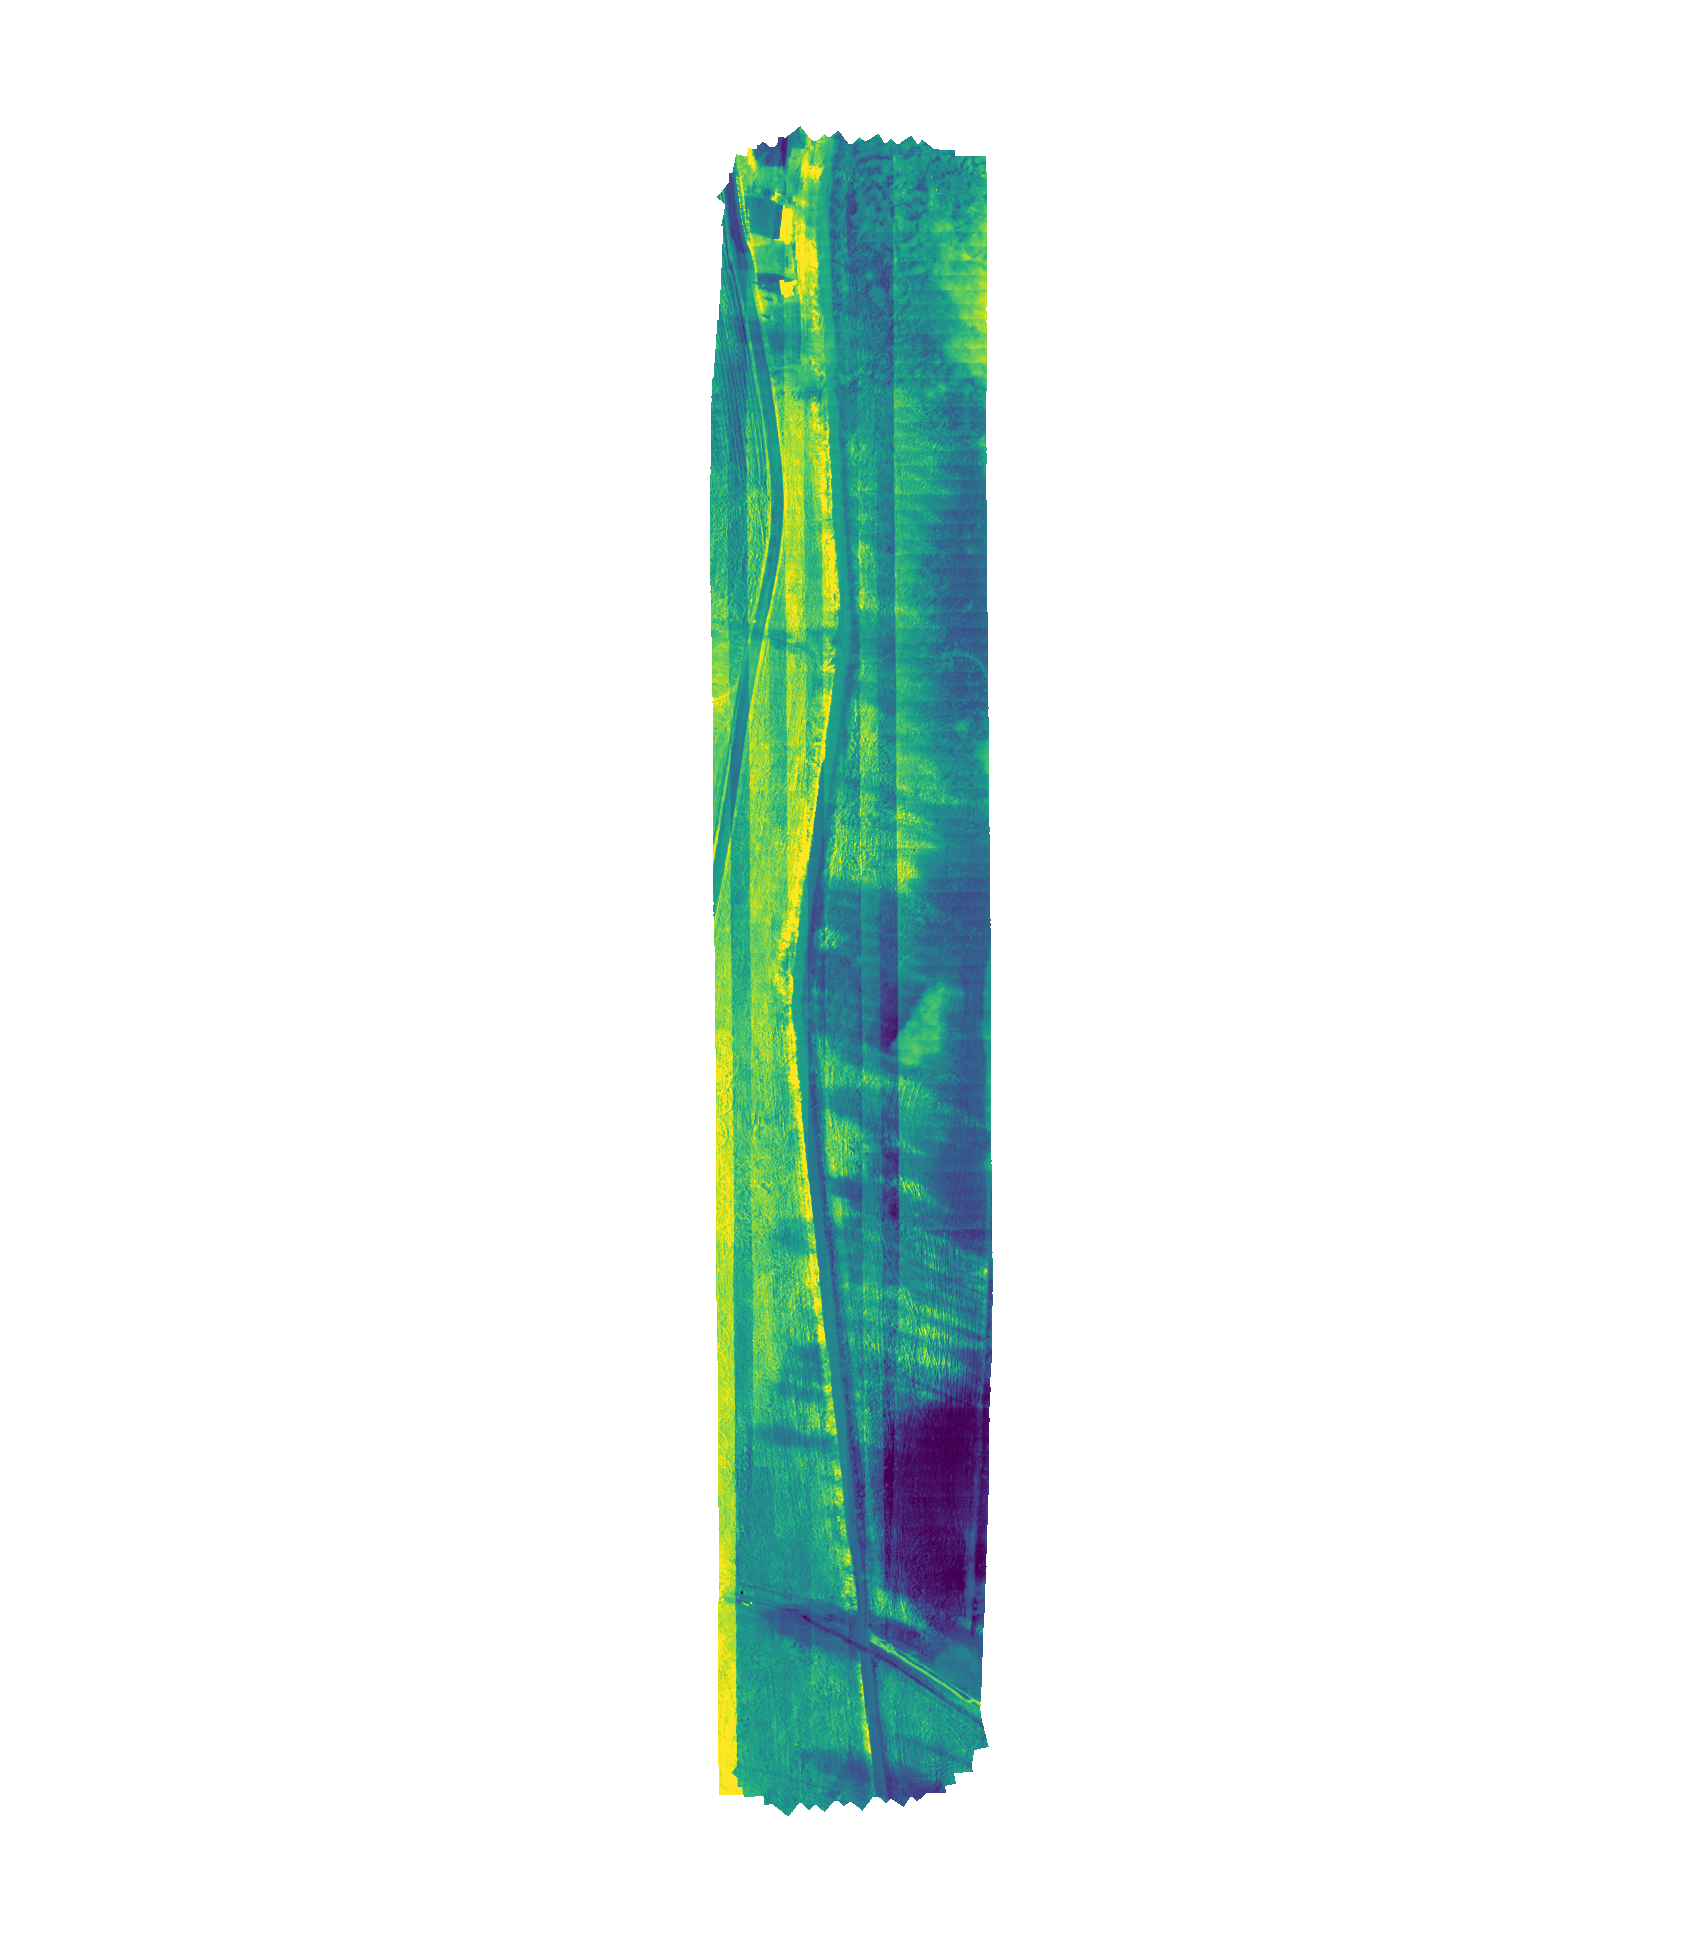

In [26]:
plt.rcParams['figure.dpi'] = 500
plt.imshow(uncal, vmin=min_val, vmax=max_val)
# remove axis
plt.axis('off')
# increase dpi
# add colorbar
plt.clim(min_val, max_val)

cbar = plt.colorbar()
cbar.set_label('Temperature (°C)')

plt.show()